Import the required libraries

In [2]:
import numpy as np
from PIL import Image
import os
import sys
import albumentations as A
import matplotlib.pyplot as plt
from PIL import Image
from PASAugmentor import PASAugmentor as PASAugmentor

Define the visualization function

In [3]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)

Read the image from the disk

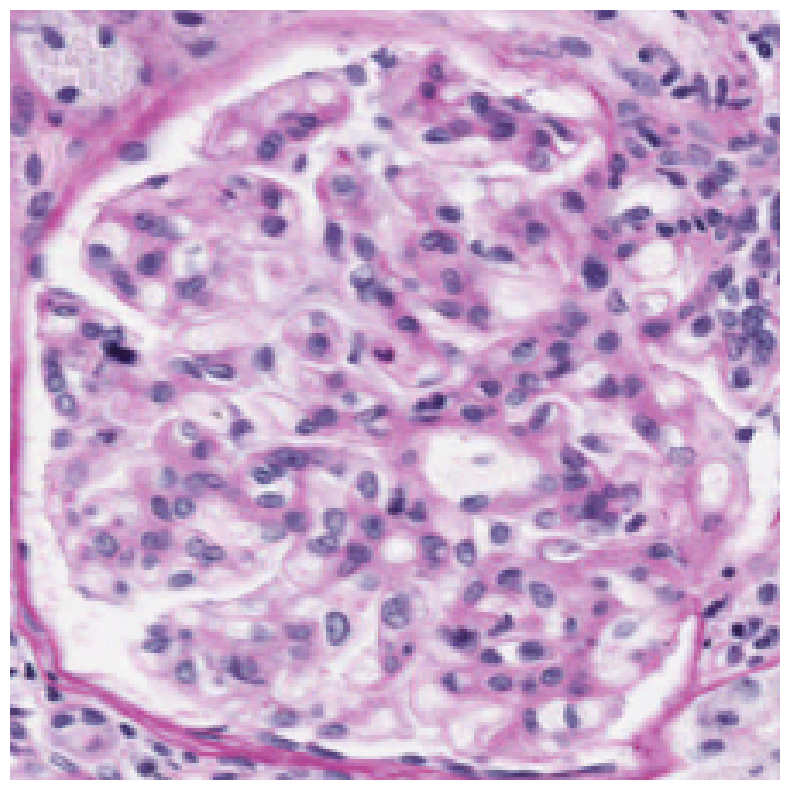

In [ ]:
image = np.array(Image.open('./Images/ExampleGlomerulus.png'))
visualize(image)

Define a single augmentation, pass the image to it and receive the random n-th augmented image 

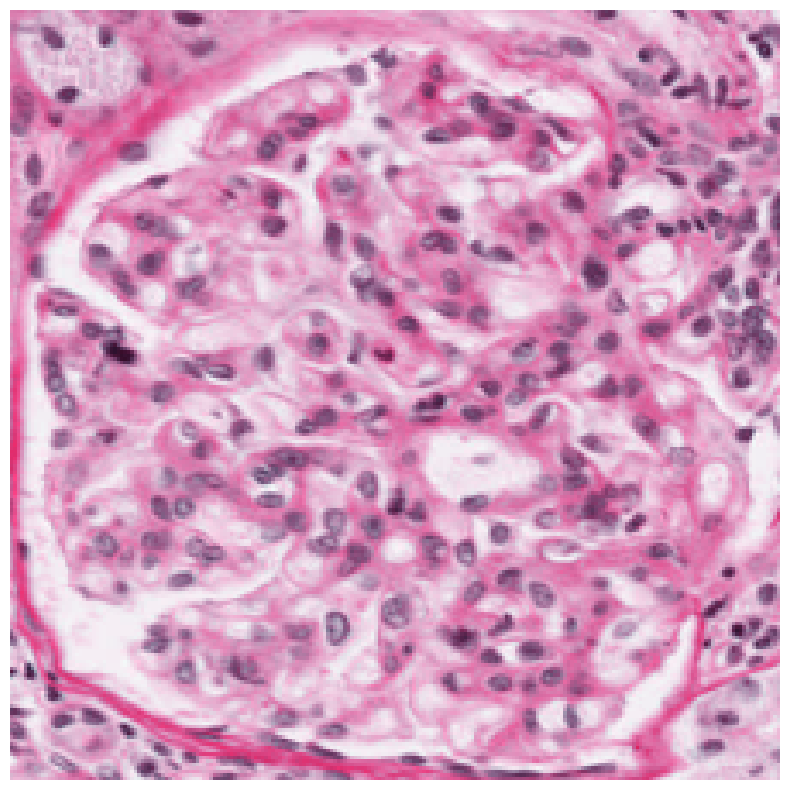

In [6]:
image_augmented = PASAugmentor(stain_augmentor="PASAugmentor",p=1,mode='Random',background_removal=False)(image=image)["image"]
visualize(image_augmented)

Define an augmentation pipeline using Compose, pass the image to it and receive the augmented image

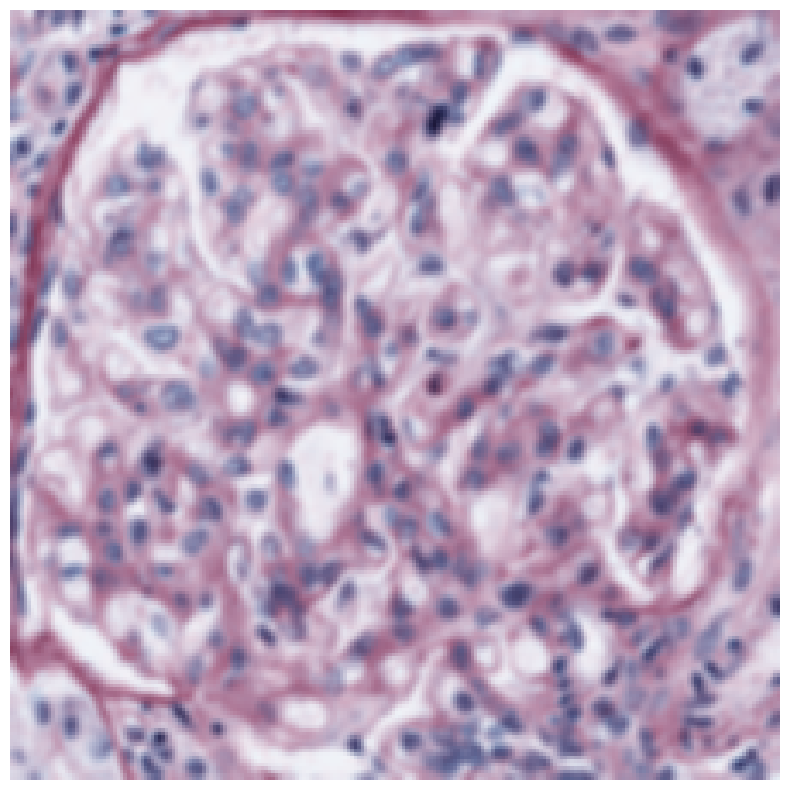

In [12]:
transform = A.Compose(
    [
        PASAugmentor(stain_augmentor="PASAugmentor", p=1, mode='Random', background_removal=False),
        A.RandomRotate90(),
        A.Flip(),
        A.Blur(blur_limit=3),
    ]
)

image_augmented = transform(image=image)["image"]
visualize(image_augmented)